In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
import warnings

In [8]:
data=pd.read_csv('Banda_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 67
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AR_U_(1)         67 non-null     float64
 1   AR_U_(2)         67 non-null     float64
 2   AR_U_(3)         67 non-null     float64
 3   AR_U_(4)         67 non-null     float64
 4   mu(U)            67 non-null     float64
 5   loglik_U         67 non-null     float64
 6   Logpost_G        67 non-null     float64
 7   MA_U             67 non-null     float64
 8   measerr_scale_U  67 non-null     float64
 9   sigma_U          67 non-null     float64
 10  var_U            67 non-null     float64
 11  L_5100           67 non-null     float64
 12  L_3000           67 non-null     float64
 13  L_UV             67 non-null     float64
 14  L_H_beta         67 non-null     float64
 15  MG_II            67 non-null     float64
 16  0II_5007         67 non-null     float64
 17  OIII_4959        6

In [9]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix


,AR_U_(1),AR_U_(2),AR_U_(3),AR_U_(4),mu(U),loglik_U,Logpost_G,MA_U,measerr_scale_U,sigma_U,var_U,L_5100,L_3000,L_UV,L_H_beta,MG_II,0II_5007,OIII_4959
AR_U_(1),1.000000,0.236859,0.078848,0.199121,-0.149735,0.208047,0.167918,0.009302,-0.025819,0.104323,0.001874,0.099488,-0.017029,-0.000022,-0.247231,0.175565,0.094805,0.027037
AR_U_(2),0.236859,1.000000,0.815037,0.124011,-0.125402,0.016917,0.177531,-0.092511,-0.064104,0.875545,0.005987,-0.086168,0.072576,-0.080025,-0.068681,0.195531,-0.275536,0.034516
AR_U_(3),0.078848,0.815037,1.000000,0.018096,-0.210117,0.096221,0.217277,-0.034644,-0.071765,0.929389,-0.023767,-0.206612,0.133325,-0.095856,-0.081814,0.162444,-0.165685,-0.005166
AR_U_(4),0.199121,0.124011,0.018096,1.000000,0.015836,-0.023402,-0.025215,-0.021267,-0.026921,0.007177,-0.087691,-0.036694,0.162281,0.121817,0.033593,0.056750,0.072030,-0.007000
mu(U),-0.149735,-0.125402,-0.210117,0.015836,1.000000,-0.381284,-0.759730,0.145545,-0.115241,-0.125595,0.173103,-0.010390,-0.025411,0.204182,0.183465,-0.006800,-0.035960,-0.011490
loglik_U,0.208047,0.016917,0.096221,-0.023402,-0.381284,1.000000,0.410678,-0.097038,0.000666,0.046898,-0.186623,-0.019078,0.040710,0.145983,-0.026526,0.033731,-0.124679,-0.141834
Logpost_G,0.167918,0.177531,0.217277,-0.025215,-0.759730,0.410678,1.000000,-0.092078,0.023132,0.143374,-0.206330,0.023650,0.061126,-0.045008,-0.089315,0.021251,-0.007525,-0.021750
MA_U,0.009302,-0.092511,-0.034644,-0.021267,0.145545,-0.097038,-0.092078,1.000000,-0.089226,-0.041723,0.022197,-0.194369,0.041320,-0.006705,0.216953,0.096974,0.176572,-0.123829
measerr_scale_U,-0.025819,-0.064104,-0.071765,-0.026921,-0.115241,0.000666,0.023132,-0.089226,1.000000,-0.067575,-0.186569,-0.038586,-0.203321,-0.168397,-0.052888,0.021070,0.010144,0.042510
sigma_U,0.104323,0.875545,0.929389,0.007177,-0.125595,0.046898,0.143374,-0.041723,-0.067575,1.000000,0.058288,-0.214579,0.125312,-0.121894,-0.074583,0.168372,-0.257133,0.025807


In [13]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
45,AR_U_(3),sigma_U,0.929389,0.929389
164,sigma_U,AR_U_(3),0.929389,0.929389
27,AR_U_(2),sigma_U,0.875545,0.875545
163,sigma_U,AR_U_(2),0.875545,0.875545
37,AR_U_(3),AR_U_(2),0.815037,0.815037
20,AR_U_(2),AR_U_(3),0.815037,0.815037
112,Logpost_G,mu(U),-0.759730,0.759730
78,mu(U),Logpost_G,-0.759730,0.759730
96,loglik_U,Logpost_G,0.410678,0.410678
113,Logpost_G,loglik_U,0.410678,0.410678


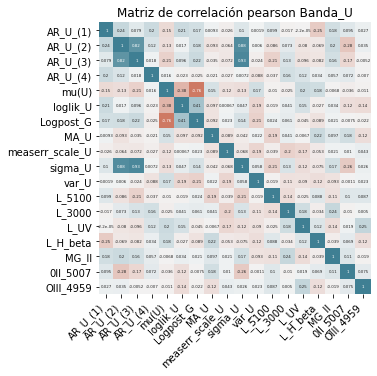

In [12]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_U")
plt.savefig("Matriz_Banda_U_pearson.pdf")

In [12]:
data=pd.read_csv('Banda_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AR_G_(1)         68 non-null     float64
 1   AR_G_(2)         68 non-null     float64
 2   AR_G_(3)         68 non-null     float64
 3   AR_G_(4)         68 non-null     float64
 4   mu(G)            68 non-null     float64
 5   loglik_G         68 non-null     float64
 6   logpost_G        68 non-null     float64
 7   MA_G             68 non-null     float64
 8   measerr_scale_G  68 non-null     float64
 9   sigma_G          68 non-null     float64
 10  VAR_G            68 non-null     float64
 11  L_5100           68 non-null     float64
 12  L_3000           68 non-null     float64
 13  L_UV             68 non-null     float64
 14  L_H_beta         68 non-null     float64
 15  MG_II            68 non-null     float64
 16  0II_5007         68 non-null     float64
 17  OIII_4959        6

In [13]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix


,AR_G_(1),AR_G_(2),AR_G_(3),AR_G_(4),mu(G),loglik_G,logpost_G,MA_G,measerr_scale_G,sigma_G,VAR_G,L_5100,L_3000,L_UV,L_H_beta,MG_II,0II_5007,OIII_4959
AR_G_(1),1.000000,0.926179,-0.064997,-0.006166,0.086623,0.006353,0.376235,-0.054564,0.212035,-0.032478,-0.030056,0.161497,-0.110468,-0.070080,-0.136864,0.197049,-0.033086,0.169993
AR_G_(2),0.926179,1.000000,-0.015681,-0.021183,0.051225,0.017939,0.501100,-0.017785,0.288070,-0.015735,0.001611,0.190703,-0.036030,-0.064413,-0.156049,0.166255,0.080946,0.169113
AR_G_(3),-0.064997,-0.015681,1.000000,-0.020361,-0.241510,0.498282,-0.025182,-0.015280,0.385326,-0.015348,-0.079852,0.016792,0.096304,-0.045736,-0.097653,0.022586,0.175146,0.143469
AR_G_(4),-0.006166,-0.021183,-0.020361,1.000000,0.065850,0.015633,-0.041100,-0.020405,-0.145205,-0.020574,-0.005754,0.227039,-0.334626,-0.082716,0.036296,-0.238183,-0.139474,0.064857
mu(G),0.086623,0.051225,-0.241510,0.065850,1.000000,-0.501156,-0.033845,0.033118,0.050939,0.090591,0.206179,-0.199317,-0.199021,-0.069954,-0.129266,0.154234,-0.051789,-0.092405
loglik_G,0.006353,0.017939,0.498282,0.015633,-0.501156,1.000000,0.054750,-0.005863,0.252030,-0.078807,-0.323943,0.188181,0.015182,-0.051164,-0.073355,-0.135613,0.077339,0.153814
logpost_G,0.376235,0.501100,-0.025182,-0.041100,-0.033845,0.054750,1.000000,-0.019308,0.077992,-0.055794,-0.101576,0.098342,0.083689,-0.087733,-0.218055,0.105736,0.016940,0.030054
MA_G,-0.054564,-0.017785,-0.015280,-0.020405,0.033118,-0.005863,-0.019308,1.000000,-0.050588,-0.014756,-0.089685,-0.073666,0.023697,-0.078575,-0.148189,0.005824,0.203395,-0.230412
measerr_scale_G,0.212035,0.288070,0.385326,-0.145205,0.050939,0.252030,0.077992,-0.050588,1.000000,-0.039250,-0.044250,0.128412,-0.049537,0.193427,-0.129842,0.108443,0.155663,0.119101
sigma_G,-0.032478,-0.015735,-0.015348,-0.020574,0.090591,-0.078807,-0.055794,-0.014756,-0.039250,1.000000,-0.093611,-0.062593,-0.199071,-0.075692,0.228641,-0.166733,0.298909,-0.078365


In [14]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,AR_G_(1),AR_G_(2),0.926179,0.926179
18,AR_G_(2),AR_G_(1),0.926179,0.926179
77,mu(G),loglik_G,-0.501156,0.501156
94,loglik_G,mu(G),-0.501156,0.501156
24,AR_G_(2),logpost_G,0.501100,0.501100
109,logpost_G,AR_G_(2),0.501100,0.501100
41,AR_G_(3),loglik_G,0.498282,0.498282
92,loglik_G,AR_G_(3),0.498282,0.498282
146,measerr_scale_G,AR_G_(3),0.385326,0.385326
44,AR_G_(3),measerr_scale_G,0.385326,0.385326


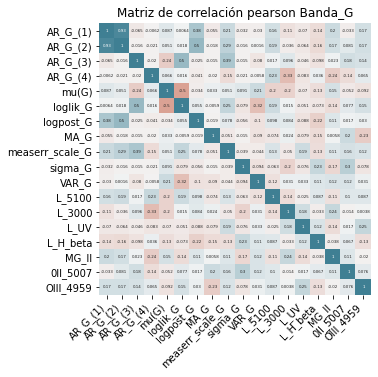

In [15]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_G")
plt.savefig("Matriz_Banda_G_pearson.pdf")

In [16]:
data=pd.read_csv('Banda_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AR_R_(1)         68 non-null     float64
 1   AR_R_(2)         68 non-null     float64
 2   AR_R_(3)         68 non-null     float64
 3   AR_R_(4)         68 non-null     float64
 4   mu_R             68 non-null     float64
 5   loglik_R         68 non-null     float64
 6   logpost_R        68 non-null     float64
 7   MA_R             68 non-null     float64
 8   Measerr_scale_R  68 non-null     float64
 9   sigma_R          68 non-null     float64
 10  VAR_R            68 non-null     float64
 11  L_5100           68 non-null     float64
 12  L_3000           68 non-null     float64
 13  L_UV             68 non-null     float64
 14  L_H_beta         68 non-null     float64
 15  MG_II            68 non-null     float64
 16  0II_5007         68 non-null     float64
 17  OIII_4959        6

In [17]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,AR_R_(1),AR_R_(2),AR_R_(3),AR_R_(4),mu_R,loglik_R,logpost_R,MA_R,Measerr_scale_R,sigma_R,VAR_R,L_5100,L_3000,L_UV,L_H_beta,MG_II,0II_5007,OIII_4959
AR_R_(1),1.000000,0.944749,0.994928,-0.020954,-0.251826,0.631661,0.631761,-0.020562,-0.010787,0.994820,0.006211,-0.129424,-0.130733,-0.028706,-0.135868,0.148650,0.000452,0.148690
AR_R_(2),0.944749,1.000000,0.924443,-0.048084,-0.294011,0.602009,0.601765,-0.046574,-0.015857,0.924859,-0.027011,-0.192706,-0.200914,-0.047858,-0.097357,0.088529,-0.014200,0.166083
AR_R_(3),0.994928,0.924443,1.000000,-0.015781,-0.234406,0.617485,0.617231,-0.015752,-0.010585,0.999973,0.017721,-0.126630,-0.111721,-0.024070,-0.173794,0.166124,0.014604,0.145646
AR_R_(4),-0.020954,-0.048084,-0.015781,1.000000,0.056984,0.031849,0.031433,-0.015438,-0.153938,-0.015815,-0.058944,-0.195700,0.087602,0.100674,0.039483,-0.042825,-0.138936,-0.052397
mu_R,-0.251826,-0.294011,-0.234406,0.056984,1.000000,-0.446877,-0.455690,0.087174,0.380233,-0.232423,0.111511,-0.157656,0.077676,0.190143,-0.017836,-0.138710,-0.086716,-0.315103
loglik_R,0.631661,0.602009,0.617485,0.031849,-0.446877,1.000000,0.999396,-0.068082,-0.146128,0.616035,-0.089487,-0.040071,-0.067749,-0.024106,-0.084837,0.187280,-0.027665,0.279790
logpost_R,0.631761,0.601765,0.617231,0.031433,-0.455690,0.999396,1.000000,-0.068627,-0.147489,0.615779,-0.091934,-0.038031,-0.073098,-0.026121,-0.088269,0.184014,-0.022579,0.284953
MA_R,-0.020562,-0.046574,-0.015752,-0.015438,0.087174,-0.068082,-0.068627,1.000000,-0.102390,-0.015810,-0.071868,-0.073666,0.023697,-0.078575,-0.148189,0.005824,0.203395,-0.230412
Measerr_scale_R,-0.010787,-0.015857,-0.010585,-0.153938,0.380233,-0.146128,-0.147489,-0.102390,1.000000,-0.009226,0.079737,-0.015186,-0.031001,-0.021092,-0.000318,-0.118888,-0.085304,-0.102741
sigma_R,0.994820,0.924859,0.999973,-0.015815,-0.232423,0.616035,0.615779,-0.015810,-0.009226,1.000000,0.018069,-0.128057,-0.112124,-0.024246,-0.172335,0.166212,0.016401,0.145423


In [18]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
164,sigma_R,AR_R_(3),0.999973,0.999973
45,AR_R_(3),sigma_R,0.999973,0.999973
113,logpost_R,loglik_R,0.999396,0.999396
96,loglik_R,logpost_R,0.999396,0.999396
2,AR_R_(1),AR_R_(3),0.994928,0.994928
36,AR_R_(3),AR_R_(1),0.994928,0.994928
162,sigma_R,AR_R_(1),0.994820,0.994820
9,AR_R_(1),sigma_R,0.994820,0.994820
18,AR_R_(2),AR_R_(1),0.944749,0.944749
1,AR_R_(1),AR_R_(2),0.944749,0.944749


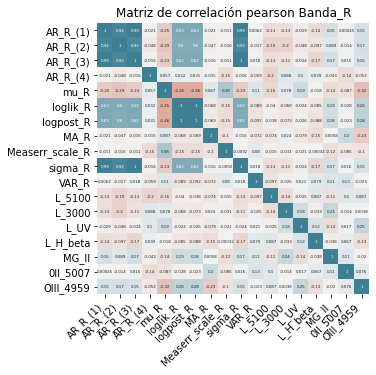

In [19]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_R")
plt.savefig("Matriz_Banda_R_pearson.pdf")

In [24]:
data=pd.read_csv('Banda_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AR_I_(1)         68 non-null     float64
 1   AR_I_(2)         68 non-null     float64
 2   AR_I_(3)         68 non-null     float64
 3   AR_I_(4)         68 non-null     float64
 4   mu_(I)           68 non-null     float64
 5   loglik_I         68 non-null     float64
 6   logpost_I        68 non-null     float64
 7   MA_I             68 non-null     float64
 8   measerr_scale_I  68 non-null     float64
 9   sigma_I          68 non-null     float64
 10  VAR_I            68 non-null     float64
 11  L_5100           68 non-null     float64
 12  L_3000           68 non-null     float64
 13  L_UV             68 non-null     float64
 14  L_H_beta         68 non-null     float64
 15  MG_II            68 non-null     float64
 16  0II_5007         68 non-null     float64
 17  OIII_4959        6

In [25]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,AR_I_(1),AR_I_(2),AR_I_(3),AR_I_(4),mu_(I),loglik_I,logpost_I,MA_I,measerr_scale_I,sigma_I,VAR_I,L_5100,L_3000,L_UV,L_H_beta,MG_II,0II_5007,OIII_4959
AR_I_(1),1.000000,0.470231,0.988516,-0.027133,-0.309526,0.687540,0.687498,-0.037847,0.073990,-0.019254,-0.074847,-0.112907,-0.117072,-0.056095,-0.162656,0.172152,0.015124,0.166960
AR_I_(2),0.470231,1.000000,0.539125,-0.036678,-0.523450,0.292669,0.292595,0.008339,-0.008774,-0.040305,-0.078403,0.132316,-0.121919,-0.121835,-0.232676,0.213098,0.110614,0.224445
AR_I_(3),0.988516,0.539125,1.000000,-0.018446,-0.309213,0.678816,0.678612,-0.018207,0.094319,-0.018442,-0.059305,-0.096092,-0.116049,-0.036717,-0.193215,0.191449,0.027415,0.172232
AR_I_(4),-0.027133,-0.036678,-0.018446,1.000000,0.064914,-0.062959,-0.063009,-0.014953,0.052364,-0.021600,0.036985,0.017153,0.094772,-0.047392,-0.097923,0.022361,0.174888,0.142960
mu_(I),-0.309526,-0.523450,-0.309213,0.064914,1.000000,-0.494875,-0.495851,0.037192,0.151084,0.052993,0.236885,-0.144949,0.096916,0.198807,-0.017271,-0.119103,-0.093304,-0.287860
loglik_I,0.687540,0.292669,0.678816,-0.062959,-0.494875,1.000000,0.999990,-0.038669,-0.060953,-0.003536,-0.253669,-0.035430,-0.101277,0.013533,-0.021625,0.130907,-0.010172,0.297311
logpost_I,0.687498,0.292595,0.678612,-0.063009,-0.495851,0.999990,1.000000,-0.038726,-0.060989,-0.003596,-0.253885,-0.035108,-0.101450,0.013339,-0.021953,0.130556,-0.010452,0.297385
MA_I,-0.037847,0.008339,-0.018207,-0.014953,0.037192,-0.038669,-0.038726,1.000000,-0.102906,-0.021568,-0.061469,-0.140459,0.023521,0.018215,-0.137532,0.059743,0.067544,-0.062792
measerr_scale_I,0.073990,-0.008774,0.094319,0.052364,0.151084,-0.060953,-0.060989,-0.102906,1.000000,0.051894,0.080263,0.009890,-0.169703,0.017859,-0.134638,0.036322,-0.173777,0.083028
sigma_I,-0.019254,-0.040305,-0.018442,-0.021600,0.052993,-0.003536,-0.003596,-0.021568,0.051894,1.000000,0.000182,-0.148729,0.207684,0.054455,-0.059544,0.018537,-0.089947,-0.035826


In [26]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
96,loglik_I,logpost_I,0.999990,0.999990
113,logpost_I,loglik_I,0.999990,0.999990
2,AR_I_(1),AR_I_(3),0.988516,0.988516
36,AR_I_(3),AR_I_(1),0.988516,0.988516
90,loglik_I,AR_I_(1),0.687540,0.687540
5,AR_I_(1),loglik_I,0.687540,0.687540
108,logpost_I,AR_I_(1),0.687498,0.687498
6,AR_I_(1),logpost_I,0.687498,0.687498
92,loglik_I,AR_I_(3),0.678816,0.678816
41,AR_I_(3),loglik_I,0.678816,0.678816


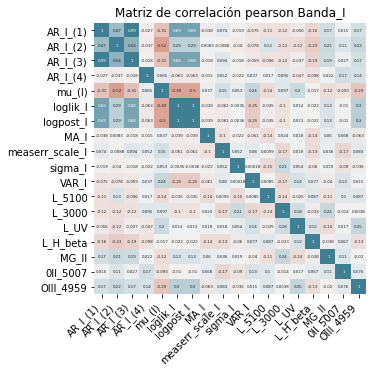

In [27]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_I")
plt.savefig("Matriz_Banda_I_pearson.pdf")

In [28]:
data=pd.read_csv('Banda_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AR_Z_(1)         68 non-null     float64
 1   AR_Z_(2)         68 non-null     float64
 2   AR_Z_(3)         68 non-null     float64
 3   AR_Z_(4)         68 non-null     float64
 4   mu_(Z)           68 non-null     float64
 5   loglik_Z         68 non-null     float64
 6   logpost_Z        68 non-null     float64
 7   MA_Z             68 non-null     float64
 8   measerr_scale_Z  68 non-null     float64
 9   sigma_Z          68 non-null     float64
 10  VAR_Z            68 non-null     float64
 11  L_5100           68 non-null     float64
 12  L_3000           68 non-null     float64
 13  L_UV             68 non-null     float64
 14  L_H_beta         68 non-null     float64
 15  MG_II            68 non-null     float64
 16  0II_5007         68 non-null     float64
 17  OIII_4959        6

In [29]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,AR_Z_(1),AR_Z_(2),AR_Z_(3),AR_Z_(4),mu_(Z),loglik_Z,logpost_Z,MA_Z,measerr_scale_Z,sigma_Z,VAR_Z,L_5100,L_3000,L_UV,L_H_beta,MG_II,0II_5007,OIII_4959
AR_Z_(1),1.000000,0.884401,0.783476,0.877292,-0.370282,0.652739,0.652739,-0.065201,-0.212802,-0.044284,-0.039054,0.054455,0.000623,0.014461,0.169538,-0.052590,0.123089,0.070564
AR_Z_(2),0.884401,1.000000,0.518874,0.682381,-0.290292,0.663754,0.663754,-0.019757,-0.184143,-0.023108,-0.006207,0.037601,0.053011,-0.054363,-0.067053,-0.005494,0.183356,0.157341
AR_Z_(3),0.783476,0.518874,1.000000,0.975147,-0.413349,0.462139,0.462139,-0.020748,-0.073966,-0.028595,-0.041912,0.137396,-0.074690,-0.044346,0.368984,-0.115090,0.005813,-0.002750
AR_Z_(4),0.877292,0.682381,0.975147,1.000000,-0.411913,0.541850,0.541850,-0.024914,-0.102831,-0.018053,-0.043646,0.132252,-0.057073,-0.050814,0.296129,-0.109811,0.051973,0.019467
mu_(Z),-0.370282,-0.290292,-0.413349,-0.411913,1.000000,-0.624324,-0.624324,0.137931,0.239720,0.060809,0.050424,-0.196748,-0.046484,0.138372,-0.172193,0.114734,0.034807,-0.071219
loglik_Z,0.652739,0.663754,0.462139,0.541850,-0.624324,1.000000,1.000000,-0.117138,-0.204942,-0.019857,-0.086918,0.129919,-0.000822,-0.086831,0.005228,-0.029607,0.025784,0.123397
logpost_Z,0.652739,0.663754,0.462139,0.541850,-0.624324,1.000000,1.000000,-0.117138,-0.204942,-0.019857,-0.086918,0.129919,-0.000822,-0.086831,0.005228,-0.029607,0.025784,0.123397
MA_Z,-0.065201,-0.019757,-0.020748,-0.024914,0.137931,-0.117138,-0.117138,1.000000,0.120926,-0.021629,-0.056812,-0.073665,0.023697,-0.078576,-0.148189,0.005823,0.203399,-0.230415
measerr_scale_Z,-0.212802,-0.184143,-0.073966,-0.102831,0.239720,-0.204942,-0.204942,0.120926,1.000000,0.056520,-0.043748,0.060276,-0.271577,-0.143613,-0.061101,0.200939,-0.071334,-0.083882
sigma_Z,-0.044284,-0.023108,-0.028595,-0.018053,0.060809,-0.019857,-0.019857,-0.021629,0.056520,1.000000,-0.089461,-0.043043,0.106871,-0.040136,-0.245787,-0.038212,0.015947,0.133207


In [30]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
96,loglik_Z,logpost_Z,1.000000,1.000000
113,logpost_Z,loglik_Z,1.000000,1.000000
56,AR_Z_(4),AR_Z_(3),0.975147,0.975147
39,AR_Z_(3),AR_Z_(4),0.975147,0.975147
1,AR_Z_(1),AR_Z_(2),0.884401,0.884401
18,AR_Z_(2),AR_Z_(1),0.884401,0.884401
3,AR_Z_(1),AR_Z_(4),0.877292,0.877292
54,AR_Z_(4),AR_Z_(1),0.877292,0.877292
2,AR_Z_(1),AR_Z_(3),0.783476,0.783476
36,AR_Z_(3),AR_Z_(1),0.783476,0.783476


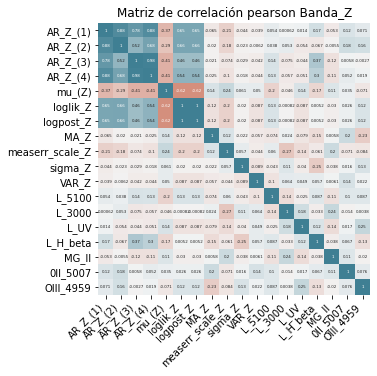

In [31]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_Z")
plt.savefig("Matriz_Banda_Z_pearson.pdf")